## Week 5 - Logistic Regression and Classification Error Metrics 

We will be using the Human Activity Recognition with Smartphones database, built from recordings of participants performing activities of daily living (ADL) while carrying a smartphone embedded with inertial sensors.  The objective is to classify activities as walking, walking upstairs, walking downstairs, sitting, standing, and laying.  

For each record in the dataset, it is provided: 
* Triaxial acceleration form the accelerometer (total acceleration) and the estimated body acceleration 
* Triaxial angular velocity from the gyroscope 
* A 561-feature vector with time and frequency domain variables
* Its activity label 



In [8]:
from __future__ import print_function 
import os 
import pandas as pd 
import numpy as np 

data_path = ['C:/Users/japor/Desktop/Machine Learning 501 Nervana/Intel-ML101-Class5/data']
filepath = os.sep.join(data_path + ['Human_Activity_Recognition_Using_Smartphones_Data.csv'])
data = pd.read_csv(filepath, sep=',')

### Question 1
Import the data and do the following: 
* Examine the data types--there are many columns, so it might be wise to use value counts 
* Determine if the floating point values need to be scaled 
* Determine the breakdown of each activity 
* Encode the activity label as an integer 

In [12]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


The data columns are all floats except for the activity label 

In [14]:
data.dtypes.head()

tBodyAcc-mean()-X    float64
tBodyAcc-mean()-Y    float64
tBodyAcc-mean()-Z    float64
tBodyAcc-std()-X     float64
tBodyAcc-std()-Y     float64
dtype: object

In [15]:
# 561 columns of float64 data types 
data.dtypes.value_counts()

float64    561
object       1
dtype: int64

In [16]:
data.dtypes.tail()

angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
dtype: object

The data are all scaled from -1 (minimum) to 1.0 (maximum). 

In [23]:
data.iloc[:, :-1].min().head(3) # :-1 index excludes 'Activity' column

tBodyAcc-mean()-X   -1.0
tBodyAcc-mean()-Y   -1.0
tBodyAcc-mean()-Z   -1.0
dtype: float64

In [24]:
# all 561 columns have min value of -1
data.iloc[:, :-1].min().value_counts()

-1.0    561
dtype: int64

In [42]:
data.iloc[:, :-1].max().head(3)

tBodyAcc-mean()-X    1.0
tBodyAcc-mean()-Y    1.0
tBodyAcc-mean()-Z    1.0
dtype: float64

In [43]:
# all 561 columns have max value of 1
# thus all scaled from -1 to 1
data.iloc[:, :-1].max().value_counts()

1.0    561
dtype: int64

In [44]:
# Breakdown of activities, relatively balanced 
data.Activity.value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

In [45]:
# Encode activity label as integer 
# Use `LabelEncoder` to `fit_transform()` activity column 
# and look at 5 random values
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Activity'] = le.fit_transform(data.Activity)
data['Activity'].sample(5)


8115    2
289     3
1244    3
4737    1
913     0
Name: Activity, dtype: int64

### Question 2
* Calculate the correlations between the dependent variables
* Create a histogram of the correlation values 
* Identify those that are most correlated (either positively or negatively) 

In [54]:
# Get dependent variable columns 
feature_cols = data.columns[:-1]
print(feature_cols)


Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=561)


In [56]:
data[feature_cols].head(3)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118


In [88]:
# Calculate the correlation values between columns 
corr_values = data[feature_cols].corr()
corr_values.head(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-mean()-X,1.000000,0.128037,-0.230302,0.004590,-0.016785,-0.036071,0.010303,-0.017488,-0.038805,0.046943,...,0.029901,-0.006179,-0.002255,-0.552989,0.015754,0.036047,0.034296,-0.041021,0.034053,0.030656
tBodyAcc-mean()-Y,0.128037,1.000000,-0.029882,-0.046352,-0.046996,-0.054153,-0.045247,-0.047673,-0.055524,-0.039445,...,-0.014402,-0.000649,-0.002842,0.077750,-0.027567,0.013241,0.077627,-0.007513,-0.005616,-0.016233
tBodyAcc-mean()-Z,-0.230302,-0.029882,1.000000,-0.024185,-0.023745,-0.015632,-0.022872,-0.022966,-0.009577,-0.040218,...,-0.015358,0.023050,0.023122,0.055020,-0.042083,-0.066233,-0.030748,0.003215,-0.012986,-0.028406
tBodyAcc-std()-X,0.004590,-0.046352,-0.024185,1.000000,0.922525,0.861910,0.998662,0.916087,0.856497,0.981226,...,-0.068807,0.165552,0.135171,-0.034334,-0.017096,0.027464,-0.027123,-0.374104,0.449425,0.393063
tBodyAcc-std()-Y,-0.016785,-0.046996,-0.023745,0.922525,1.000000,0.888259,0.918561,0.997510,0.887052,0.911137,...,-0.109941,0.220279,0.191164,-0.020806,-0.006605,0.001902,-0.015784,-0.381391,0.506106,0.425511
tBodyAcc-std()-Z,-0.036071,-0.054153,-0.015632,0.861910,0.888259,1.000000,0.855837,0.884999,0.997360,0.859956,...,-0.097796,0.176514,0.147580,-0.009823,-0.015043,-0.004984,-0.012196,-0.353271,0.459092,0.483424
tBodyAcc-mad()-X,0.010303,-0.045247,-0.022872,0.998662,0.918561,0.855837,1.000000,0.912076,0.850538,0.973868,...,-0.062623,0.166656,0.137312,-0.042121,-0.016774,0.027729,-0.027097,-0.371168,0.444926,0.389481
tBodyAcc-mad()-Y,-0.017488,-0.047673,-0.022966,0.916087,0.997510,0.884999,0.912076,1.000000,0.884517,0.904283,...,-0.106301,0.213620,0.185541,-0.024177,-0.006267,-0.002924,-0.013411,-0.378013,0.507947,0.424479
tBodyAcc-mad()-Z,-0.038805,-0.055524,-0.009577,0.856497,0.887052,0.997360,0.850538,0.884517,1.000000,0.853439,...,-0.099580,0.177073,0.149069,-0.011856,-0.015747,-0.009873,-0.012800,-0.355836,0.460345,0.480032
tBodyAcc-max()-X,0.046943,-0.039445,-0.040218,0.981226,0.911137,0.859956,0.973868,0.904283,0.853439,1.000000,...,-0.080062,0.169477,0.136950,-0.031642,-0.018547,0.033533,-0.030908,-0.384244,0.458832,0.402873


In [89]:
# Return the indices for the lower-triangle
tril_index = np.tril_indices_from(corr_values)
tril_index[0][:10] # row indices of lower triangle 

array([0, 1, 1, 2, 2, 2, 3, 3, 3, 3], dtype=int64)

In [90]:
tril_index[1][:10] # column indices of lower triangle 

array([0, 0, 1, 0, 1, 2, 0, 1, 2, 3], dtype=int64)

In [91]:
# trill_index[0], trill_index[1] are [0,0], [1,0], [1,1], [2,0]...

# Simplify by emptying all the data below diagonal 
# Make the unused values NaNs (lower triangle)
for coord in zip(*tril_index): 
    corr_values.iloc[coord[0], coord[1]] = np.NaN

In [72]:
corr_values.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-mean()-X,NaN,0.128037,-0.230302,0.004590,-0.016785,-0.036071,0.010303,-0.017488,-0.038805,0.046943,...,0.029901,-0.006179,-0.002255,-0.552989,0.015754,0.036047,0.034296,-0.041021,0.034053,0.030656
tBodyAcc-mean()-Y,NaN,NaN,-0.029882,-0.046352,-0.046996,-0.054153,-0.045247,-0.047673,-0.055524,-0.039445,...,-0.014402,-0.000649,-0.002842,0.077750,-0.027567,0.013241,0.077627,-0.007513,-0.005616,-0.016233
tBodyAcc-mean()-Z,NaN,NaN,NaN,-0.024185,-0.023745,-0.015632,-0.022872,-0.022966,-0.009577,-0.040218,...,-0.015358,0.023050,0.023122,0.055020,-0.042083,-0.066233,-0.030748,0.003215,-0.012986,-0.028406
tBodyAcc-std()-X,NaN,NaN,NaN,NaN,0.922525,0.861910,0.998662,0.916087,0.856497,0.981226,...,-0.068807,0.165552,0.135171,-0.034334,-0.017096,0.027464,-0.027123,-0.374104,0.449425,0.393063
tBodyAcc-std()-Y,NaN,NaN,NaN,NaN,NaN,0.888259,0.918561,0.997510,0.887052,0.911137,...,-0.109941,0.220279,0.191164,-0.020806,-0.006605,0.001902,-0.015784,-0.381391,0.506106,0.425511


In [92]:
# Stack the data and convert to a dataframe 
corr_values = (corr_values
               .stack() # combine into one Series
               .to_frame() 
               .reset_index() # the old index is added as a column, and a new sequential index is used
               .rename(columns = {'level_0': 'feature1', 'level_1': 'feature2', 0: 'correlation'})) 
                # rename columns named 'level_0' to 'feature1', etc.

In [94]:
corr_values.head()

,feature1,feature2,correlation
0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,0.128037
1,tBodyAcc-mean()-X,tBodyAcc-mean()-Z,-0.230302
2,tBodyAcc-mean()-X,tBodyAcc-std()-X,0.004590
3,tBodyAcc-mean()-X,tBodyAcc-std()-Y,-0.016785
4,tBodyAcc-mean()-X,tBodyAcc-std()-Z,-0.036071


In [109]:
# Get the absolute values for sorting 
corr_values['abs_correlation'] = corr_values.correlation.abs()

In [110]:
corr_values.head()

,feature1,feature2,correlation,abs_correlation
0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,0.128037,0.128037
1,tBodyAcc-mean()-X,tBodyAcc-mean()-Z,-0.230302,0.230302
2,tBodyAcc-mean()-X,tBodyAcc-std()-X,0.004590,0.004590
3,tBodyAcc-mean()-X,tBodyAcc-std()-Y,-0.016785,0.016785
4,tBodyAcc-mean()-X,tBodyAcc-std()-Z,-0.036071,0.036071


In [111]:
import matplotlib.pyplot as plt 
import seaborn as sns 
% matplotlib inline

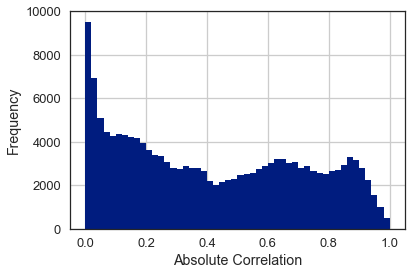

In [116]:
# Histogram of the absolute value correlations 
sns.set_context('talk') # context options for plot are "paper", "talk", "poster", etc
sns.set_style('white')
sns.set_palette('dark')

ax = corr_values.abs_correlation.hist(bins = 50)
ax.set(xlabel = 'Absolute Correlation', ylabel = 'Frequency'); 


In [119]:
# the most highly correlated values 
corr_values.sort_values('correlation', ascending = False).query('abs_correlation > 0.8')

,feature1,feature2,correlation,abs_correlation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
92472,tBodyAccMag-std(),tGravityAccMag-std(),1.000000,1.000000
156049,fBodyBodyAccJerkMag-mean(),fBodyBodyAccJerkMag-sma(),1.000000,1.000000
95316,tBodyAccMag-arCoeff()1,tGravityAccMag-arCoeff()1,1.000000,1.000000
93189,tBodyAccMag-max(),tGravityAccMag-max(),1.000000,1.000000
95667,tBodyAccMag-arCoeff()2,tGravityAccMag-arCoeff()2,1.000000,1.000000


### Question 3 
* Split the data into train and test data sets. This can be done using any method, but consider using `Scikit-learn`'s `StratifiedShuffleSplit()` to maintain the same ratio of predictor classes. 
* Regardless of methods used to split the data, compare the ratio of classes in both the train and test splits. 

In [161]:
from sklearn.model_selection import StratifiedShuffleSplit

# get the split indexes 
strat_shuf_split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3, random_state = 42)

train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.Activity))
# strat_shuf_split.split(X,Y) makes generator
# next() runs generator and unpacks to train_idx and test_idx

In [171]:
test1 = strat_shuf_split.split(data[feature_cols], data.Activity)
print(test1)
print('\n')
test1 = next(strat_shuf_split.split(data[feature_cols], data.Activity))
print(test1)

<generator object BaseShuffleSplit.split at 0x0000017702590150>


(array([1575, 1707, 6425, ..., 3037, 3002,  996], dtype=int64), array([7743,  969, 3175, ..., 8914, 8756, 1470], dtype=int64))


In [172]:
# Create dataframes 
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'Activity']

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'Activity']

In [178]:
y_train.value_counts()

0    1361
2    1334
1    1244
3    1205
5    1081
4     984
Name: Activity, dtype: int64

In [179]:
# with normalization 
y_train.value_counts(normalize = True)

0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: Activity, dtype: float64

In [180]:
y_test.value_counts(normalize = True)

0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: Activity, dtype: float64

### Question 4 
* Fit a logistic regression model without any regularization using all of the features. Be sure to read the documentation about fitting a multi-class model so you understand the coefficent output. Store the model 
* Using cross validation to determine the hyperparameters, fit models using L1, and L2 regularizations. The regularized models, in particular the L1 model, will probably take a while to fit. 

In [524]:
from sklearn.linear_model import LogisticRegression 

# standard logistic regression 
lr = LogisticRegression().fit(X_train, y_train)

In [525]:
from sklearn.linear_model import LogisticRegressionCV

# L1 (lasso) regularized logistic regression - liblinear 
lr_l1 = LogisticRegressionCV(Cs = 10, # Cs represents inverse of reg strength (like 1/C)
                             cv = 4, # number of folds used 
                             penalty = 'l1', # L1 reg penalization
                             solver = 'liblinear').fit(X_train, y_train)

In [410]:
# L1 regularized logistic regression - saga 
lr_l1_saga = LogisticRegressionCV(Cs = 10,
                                  cv = 4,
                                  penalty = 'l1', 
                                  solver = 'saga').fit(X_train, y_train)

In [411]:
# L2 regularized logistic regression - newton-cg 
lr_l2_newtoncg = LogisticRegressionCV(Cs = 10, 
                                      cv = 4, 
                                      penalty = 'l2', 
                                      solver = 'newton-cg').fit(X_train, y_train)

In [412]:
# L2 regularized logistic regression - lbfgs
lr_l2_lbfgs = LogisticRegressionCV(Cs = 10,
                                   cv = 4,
                                   penalty = 'l2', 
                                   solver = 'lbfgs').fit(X_train, y_train)

In [413]:
# L2 regularized logistic regression - sag 
lr_l2_sag = LogisticRegressionCV(Cs = 10,
                                 cv = 4,
                                 penalty = 'l2', 
                                 solver = 'sag').fit(X_train, y_train)

In [532]:
# L2 (ridge) regularized logistic regression 
lr_l2 = LogisticRegressionCV(Cs = 10, 
                             cv = 4, 
                             penalty = 'l2').fit(X_train, y_train)

### Question 5 
Compare the magnitudes of the coefficients for each of the models. If one-vs-rest fitting was used, each set of coefficients can be plotted separately 

In [533]:
# Combine all the coefficients into a dataframe 
coefficients = list() 
 
coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab, mod in zip(coeff_labels, coeff_models): 
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels = [[lab], [0,1,2,3,4,5]], 
                                labels = [[0,0,0,0,0,0], [0,1,2,3,4,5]])
    coefficients.append(pd.DataFrame(coeffs.T, columns = coeff_label))
    # .T transposes index and columns 
    # coefficients is a list of 3 (lr, lr_l1, lr_l2) matrices (561x6)

# concatenate matrices by column     
coefficients = pd.concat(coefficients, axis = 1)

In [534]:
coefficients.head()

lr                                                     l1            \
          0         1         2         3         4         5    0         1   
0 -0.087506 -0.445226  0.257963 -0.169284  0.765611 -0.080084  0.0  0.000000   
1  0.014493 -0.201046  0.060892 -0.023509  0.107967 -0.247193  0.0  0.000000   
2  0.030187  0.063196  0.245909  0.022339  0.058980 -0.402526  0.0  0.000000   
3  0.004590 -0.733963 -0.352732 -0.701328  0.266984  0.696120  0.0 -1.891771   
4 -0.045407 -0.034154 -0.451850  0.260244 -0.516844  0.106248  0.0  0.000000   

                                                 l2                      \
          2         3         4         5         0         1         2   
0  0.000000 -1.422772  4.603116 -0.102352 -0.235453 -0.730143  0.555234   
1  0.000000  0.000000  0.000000  0.000000  0.058826 -0.375863  0.134964   
2  0.000000  0.000000  0.000000  0.000000  0.044182 -0.095351  0.384476   
3 -0.391726 -1.658308  0.000000  2.047648  0.080161 -1.080294 -0.406842   
4 -1.357567  0.686418 -1.804900  0.000000 -0.040035  0.117634 -0.550726   

                                 
          3         4         5  
0 -0.167745  2.760511  0.071653  
1 -0.131836  0.258213 -0.535216  
2  0.038424 -0.076509 -1.054263  
3 -1.355304  0.273160  1.691713  
4  0.726793 -1.312551  0.155951

In [535]:
coefficients.sample(10)

lr                                                          l1  \
            0         1         2         3         4         5         0   
418 -0.003388  0.210512  0.201094 -0.105043  0.158601  0.011172 -0.037155   
8    0.008111 -0.168286 -0.154104 -0.004435 -0.501475  0.201388  0.031835   
471  0.001967  0.201009  0.286703  0.114569 -0.008619  0.251072  0.000000   
499  0.005701  0.203175  0.290957  0.137564  0.189261 -0.024934 -0.260788   
477  0.001074  0.246611  0.257537 -0.143951  0.396428  0.348989  0.000000   
512  0.056955  0.387115 -0.145602  0.129767 -0.647183  0.011195  0.000000   
523 -0.048727 -0.516775  0.832655  0.250360  0.164049  0.689149  0.000000   
313  0.011777  0.165731  0.271566 -0.003810  0.121893  0.149467  0.000000   
361 -0.029097  0.061203 -0.048400 -0.058914 -0.051001 -0.288638  0.000000   
308  0.008631  0.175014  0.263658  0.024114  0.142338  0.097972  0.000000   

                                                             l2            \
            1         2         3         4         5         0         1   
418  0.017748  0.000000  0.000000  0.252644  0.000000 -0.043856  0.186807   
8    0.000000  0.000000  0.000000 -1.128559  0.000000  0.007746 -0.211454   
471  0.194143  0.427874  0.250088  0.000000  0.315053 -0.038705  0.153558   
499  0.000000  0.602014  0.000000  0.123947  0.062175 -0.019580  0.143629   
477  0.363246  0.311448  0.000000  0.133357  0.189438 -0.039447  0.211665   
512  0.457968  0.000000 -0.026336 -2.059759  0.000000  0.287181  0.699666   
523 -0.623800  0.394442  0.565603  0.000000  2.075359 -0.071249 -0.576268   
313  0.000000  0.296164  0.000000  0.046508  0.033801  0.005249  0.110213   
361  0.000000  0.000000 -0.096945  0.000000 -0.251311 -0.077339  0.008639   
308  0.000000  0.108989  0.030822  0.138694  0.127065 -0.002823  0.121722   

                                             
            2         3         4         5  
418  0.143848 -0.359590  0.207665 -0.245356  
8   -0.185204  0.095858 -1.265787  0.531456  
471  0.160002 -0.099159 -0.066860  0.180397  
499  0.198499 -0.010219  0.509083 -0.392127  
477  0.213144 -0.730134  0.861810  0.548924  
512 -0.240641 -0.031305 -1.515021  0.202913  
523  1.203162  0.458126  0.381804  1.566419  
313  0.177093 -0.305342 -0.239109  0.006739  
361 -0.128069 -0.232730 -0.033939 -0.355202  
308  0.174295 -0.230353 -0.166979 -0.050457

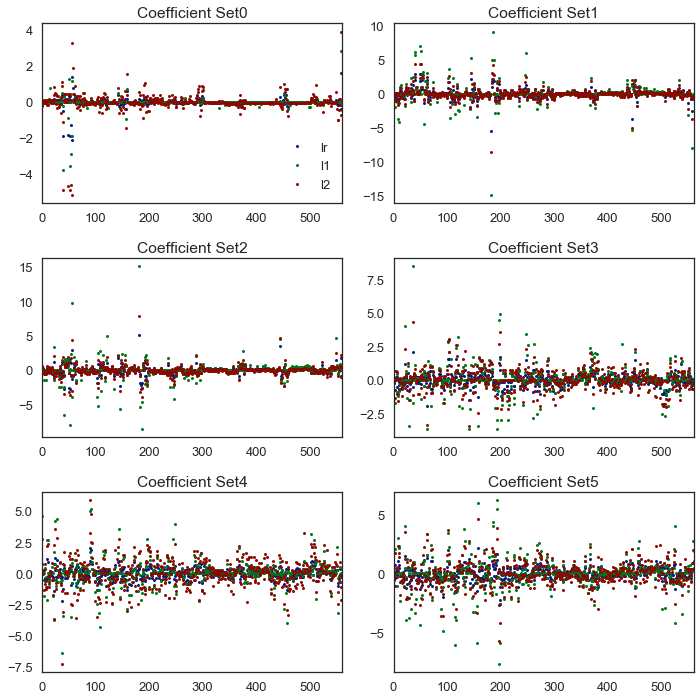

In [536]:
# Plot 6 plots of each multi-class coefficient 
fig, axList = plt.subplots(nrows = 3, ncols = 2)
axList = axList.flatten()
fig.set_size_inches(10,10)

# iterate through each classification 0,1,2,3,4,5
for ax in enumerate(axList): 
    loc = ax[0] # loc is 0,1,2,3,4,5 for each plot/classification
    ax = ax[1]
    # print(loc, ax)
    
    # .xs() returns column (axis = 1) of coefficients for each class (loc)
    data = coefficients.xs(loc, level = 1, axis = 1) # level 1 is labels (lr,..)
    # print (data.head(10)) # data is all the coefficients for each class
    data.plot(marker = 'o', ls = '', ms = 3.0, ax = ax, legend = False)
    
    if ax is axList[0]: # if 1st plot, plot legend
        ax.legend(loc = 4) # location of legend (loc=4 is 'lower right')
    
    ax.set(title = 'Coefficient Set' + str(loc))

    plt.tight_layout()

In [313]:
axList

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000177150A3F60>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000177028A4470>], dtype=object)

In [267]:
axList.flatten()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000177038D2EB8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000177145DBB38>], dtype=object)

In [279]:
for ax in enumerate(axList): 
    print (ax)
    print (ax[0])

(0, <matplotlib.axes._subplots.AxesSubplot object at 0x000001770F983EB8>)
0
(1, <matplotlib.axes._subplots.AxesSubplot object at 0x00000177132D40B8>)
1
(2, <matplotlib.axes._subplots.AxesSubplot object at 0x0000017703729438>)
2
(3, <matplotlib.axes._subplots.AxesSubplot object at 0x00000177104C7320>)
3
(4, <matplotlib.axes._subplots.AxesSubplot object at 0x0000017702D0FF60>)
4
(5, <matplotlib.axes._subplots.AxesSubplot object at 0x0000017713A87B38>)
5


In [284]:
coefficients.xs(560)

lr  0   -0.188309
    1   -0.298022
    2    0.416920
    3    0.065047
    4   -0.042363
    5    0.438815
l1  0   -1.218370
    1    0.000000
    2    0.000000
    3    0.000000
    4    0.000000
    5    2.484730
l2  0   -0.450592
    1   -0.292043
    2    0.582634
    3    0.104448
    4   -0.199100
    5    1.032006
Name: 560, dtype: float64

### Question 6 
* Predict and store the class for each model. 
* Also store the probability for the predicted class for each model. 

In [537]:
# Predict the class and the probability for each 

y_pred = list()
y_prob = list() 

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab, mod in zip(coeff_labels, coeff_models): 
    y_pred.append(pd.Series(mod.predict(X_test), 
                            name = lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test)
                            .max(axis = 1),  # prob of highest class
                            name = lab))
    
y_pred = pd.concat(y_pred, axis = 1)
y_prob = pd.concat(y_prob, axis = 1)


In [538]:
y_pred.head(10) # predicted classification 

,lr,l1,l2
0,3,3,3
1,5,5,5
2,3,3,3
3,1,1,1
4,0,0,0
5,5,5,5
6,0,0,0
7,2,2,2
8,0,0,0
9,0,0,0


In [539]:
y_prob.head(10) # highest probability 

,lr,l1,l2
0,0.998939,0.998931,0.999816
1,0.988165,0.999632,0.999967
2,0.987592,0.995371,0.998757
3,0.981381,0.999161,0.994516
4,0.998277,0.999918,0.999637
5,0.981715,0.998923,0.999757
6,0.998815,0.999998,0.999965
7,0.996950,0.999716,0.999407
8,0.999703,1.000000,0.999997
9,0.997391,0.999982,0.999596


### Question 7
For each model, calculate the following error metrics: 
* accuracy 
* precision
* recall 
* fscore 
* confusion matrix 

Decide how to combine the multi-class metrics into a single value for each model. 

In [540]:
from sklearn.metrics import precision_recall_fscore_support as score 
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list() 
cm = dict() 

for lab in coeff_labels: 
    
    # precision, recall, f-score from the multi-class support function 
    precision, recall, fscore, __ = score(y_test, y_pred[lab], 
                                          average = 'weighted')
    
    # usual way to calculate accuracy 
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data 
    auc = roc_auc_score(label_binarize(y_test, classes = [0,1,2,3,4,5]), 
                        label_binarize(y_pred[lab], classes = [0,1,2,3,4,5]), 
                        average = 'weighted')
    
    # confusion matrix 
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision': precision, 
                              'recall': recall, 
                              'fscore': fscore, 
                              'accuracy': accuracy, 
                              'auc': auc}, name = lab))
    
metrics = pd.concat(metrics, axis = 1)
metrics 

,lr,l1,l2
accuracy,0.984142,0.983819,0.984466
auc,0.990384,0.990144,0.990545
fscore,0.984143,0.983815,0.984465
precision,0.984144,0.983835,0.984474
recall,0.984142,0.983819,0.984466


### Question 8 
Display or plot the confusion matrix for each model
* The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. 

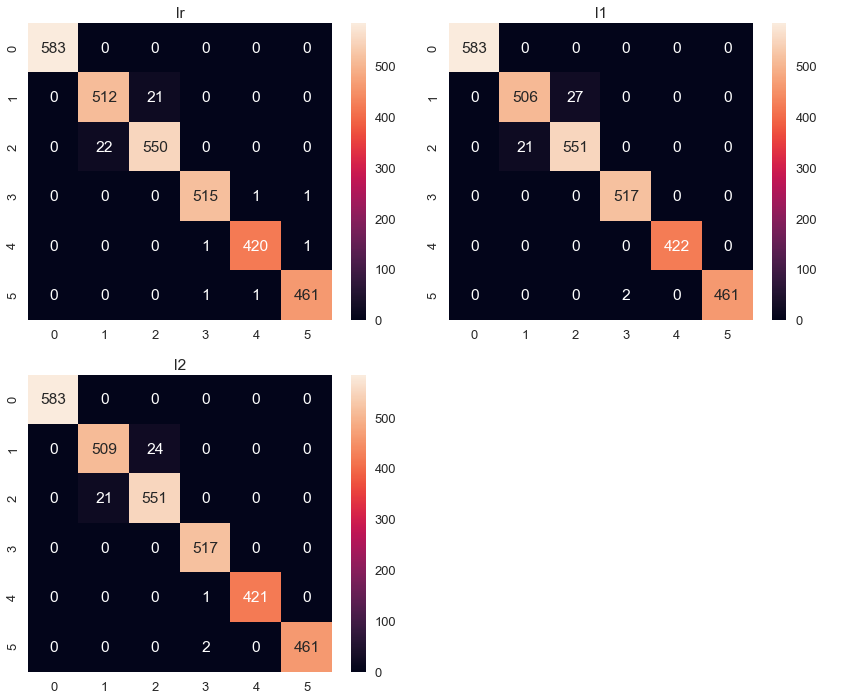

In [541]:
# Plot confusion matrix 
fig, axList = plt.subplots(nrows = 2, ncols = 2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off') # takes away 4th plot 

for ax, lab in zip(axList[:-1], coeff_labels): 
    sns.heatmap(cm[lab], 
                ax = ax, 
                annot = True, # annotate each cell w/ number
                fmt = 'd'); # annotate with integer format (as opposed to 5e83)
    ax.set(title = lab); 
    
plt.tight_layout()

### Question 9 
Identify highly correlated columns and drop these columns before building models 

In [542]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold

# threshold with p = 0.7 
# variance = p(1-p)
sel = VarianceThreshold(threshold = 0.7 * (1 - 0.7))

data2 = pd.concat([X_train, X_test])
data_new = pd.DataFrame(sel.fit_transform(data2))

In [543]:
data2.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
1575,0.354038,-0.032713,-0.130041,-0.262424,0.213368,0.103241,-0.292688,0.114425,0.122945,0.090419,...,-0.034248,-0.248922,-0.673247,-0.692530,0.539061,0.083129,0.122397,-0.829735,0.215729,0.023493
1707,0.217986,-0.013950,0.006195,-0.140788,0.312550,-0.309374,-0.179453,0.211400,-0.318358,-0.090573,...,0.338595,-0.611985,-0.848264,0.236568,-0.441150,0.719080,-0.777237,-0.743027,0.272845,0.050328
6425,0.429555,-0.030768,-0.050656,0.069298,0.082567,-0.538511,0.028144,0.014597,-0.539264,0.315044,...,0.023736,-0.332305,-0.614980,-0.587161,-0.435031,0.939978,-0.657833,-0.742034,0.258188,0.098395
264,0.220094,-0.021543,-0.150737,-0.281767,0.199338,-0.311321,-0.348109,0.134624,-0.293746,-0.072468,...,0.307094,-0.093744,-0.466167,0.347365,-0.207212,-0.573316,0.053898,-0.709921,0.286104,0.088707
5972,0.280316,-0.017974,-0.107913,-0.993586,-0.993226,-0.994115,-0.993474,-0.992884,-0.993826,-0.939849,...,0.575540,-0.831962,-0.941196,0.162183,0.553389,0.167537,0.030828,0.611652,-0.363668,-0.648606


In [544]:
data_new.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.213368,0.114425,0.090419,0.009405,0.390468,0.964709,0.898673,0.976981,0.902955,-0.769341,...,0.739094,0.820158,0.604088,0.700367,0.646760,0.827220,0.671070,0.083129,0.122397,-0.829735
1,0.312550,0.211400,-0.090573,-0.013315,0.473426,0.953887,0.883694,0.970516,0.874426,-0.447510,...,0.572422,0.621597,0.387711,0.658509,0.549343,0.686046,0.484174,0.719080,-0.777237,-0.743027
2,0.082567,0.014597,0.315044,-0.024325,0.315426,0.929001,0.863500,0.937151,0.809718,0.155322,...,0.609490,0.643620,0.658768,0.567719,0.513189,0.662146,0.515943,0.939978,-0.657833,-0.742034
3,0.199338,0.134624,-0.072468,-0.118091,0.336504,0.935557,0.867831,0.946704,0.826658,0.744693,...,0.580424,0.836728,0.594899,0.590456,0.597167,0.688792,0.607272,-0.573316,0.053898,-0.709921
4,-0.993226,-0.992884,-0.939849,-0.994908,-0.511278,-0.501756,-0.569215,-0.450999,-0.999328,-0.342019,...,-0.920371,-0.955302,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.167537,0.030828,0.611652


In [404]:
data_y = pd.concat([y_train, y_test])
data_y.head()

1575    3
1707    3
6425    4
264     3
5972    0
Name: Activity, dtype: int64

In [545]:
# split data using new dataset w/o correlated columns 
from sklearn.model_selection import train_test_split

X_new, X_test_new = train_test_split(data_new)
Y_new, Y_test_new = train_test_split(data_y)

In [546]:
X_test_new.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
9409,-0.939094,-0.936180,-0.938433,-0.977813,-0.704925,0.960576,0.886141,0.980233,0.892015,0.622440,...,-0.394975,-0.771947,-0.666989,-0.748065,-0.940965,-0.464177,-0.795886,0.025219,-0.408070,-0.819227
5794,-0.113300,-0.126738,-0.255577,-0.195921,0.624951,0.805063,0.742527,0.813489,0.504275,0.533808,...,0.329877,0.545829,0.280021,0.319682,0.144096,0.537423,0.297602,0.871183,-0.355491,-0.495678
10070,-0.244974,-0.334758,-0.214168,-0.160444,0.521471,0.935257,0.881826,0.944874,0.825933,0.840250,...,0.607015,0.770448,0.608890,0.520163,0.438402,0.711111,0.712395,0.933510,-0.860352,-0.769186
178,-0.988054,-0.987124,-0.935489,-0.987597,-0.433595,-0.435804,-0.501697,-0.387365,-0.998609,-0.242752,...,-0.874570,-0.739692,-0.918335,-0.907014,-1.000000,-0.729408,-1.000000,-0.411296,0.219477,0.564526
54,-0.966471,-0.970426,-0.938575,-0.983141,-0.586245,0.970922,0.896528,0.990087,0.919392,0.019826,...,-0.714514,-0.572272,-0.778737,-0.843671,-1.000000,-0.585639,-0.871306,0.024498,0.115892,-0.927320


Try logistic regression with new data (no correlated features) 

In [ ]:
# something weird here, DOUBLE CHECK

In [550]:
# Standard logistic regression w/ new data (no correlated features, ncf)
lr_ncf = LogisticRegression().fit(X_new, Y_new)


In [552]:
# L1 (lasso) regularized logistic regression - liblinear (no correlated features)
lr_l1_ncf = LogisticRegressionCV(Cs = 10, # Cs represents inverse of reg strength (like 1/C)
                             cv = 4, # number of folds used 
                             penalty = 'l1', # L1 reg penalization
                             solver = 'liblinear').fit(X_new, Y_new)


In [553]:
# L2 (ridge) regularized logistic regression 
lr_l2_ncf = LogisticRegressionCV(Cs = 10, 
                             cv = 4, 
                             penalty = 'l2').fit(X_new, Y_new)


In [554]:
coefficients_ncf = list()
coeff_labels_ncf = ['lr_ncf', 'l1_ncf', 'l2_ncf']
coeff_models_ncf = [lr_ncf, lr_l1_ncf, lr_l2_ncf]

for lab, mod in zip(coeff_labels_ncf, coeff_models_ncf): 
    coeffs_ncf = mod.coef_
    coeff_label_ncf = pd.MultiIndex(levels = [[lab], [0,1,2,3,4,5]], # 2 levels of labels 
                                    labels = [[0,0,0,0,0,0], [0,1,2,3,4,5]]) # all classes [0,1,2,3,4,5] will be labeled with element 0 of [lab]
    coefficients_ncf.append(pd.DataFrame(coeffs_ncf.T, columns = coeff_label_ncf))
    
# concatenate matrices by column 
coefficients_ncf = pd.concat(coefficients_ncf, axis = 1)

In [555]:
coeff_label_ncf

MultiIndex(levels=[['l2_ncf'], [0, 1, 2, 3, 4, 5]],
           labels=[[0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5]])

In [556]:
coefficients_ncf.head()

lr_ncf                                                   l1_ncf       \
          0         1         2         3         4         5      0    1   
0 -0.363665  0.354177 -0.454422  0.129338 -0.069116  0.164106    0.0  0.0   
1  0.104497 -0.353798  0.040544  0.142857  0.186873 -0.002797    0.0  0.0   
2 -0.327582  0.323563  0.206329 -0.028860  0.012457 -0.163763    0.0  0.0   
3  0.274289 -0.244101  0.570850 -0.246756  0.370223 -0.553675    0.0  0.0   
4 -0.052458  0.033026  0.106353  0.103606  0.105071 -0.257179    0.0  0.0   

                         l2_ncf                                          \
     2    3    4    5         0         1         2         3         4   
0  0.0  0.0  0.0  0.0 -0.000786  0.001654 -0.000583  0.002052 -0.001937   
1  0.0  0.0  0.0  0.0 -0.000733  0.001529 -0.000647  0.001981 -0.001826   
2  0.0  0.0  0.0  0.0 -0.000942  0.001270  0.000753  0.002076 -0.003037   
3  0.0  0.0  0.0  0.0 -0.000629  0.000967  0.000173  0.001804 -0.002389   
4  0.0  0.0  0.0  0.0 -0.000829  0.001084 -0.000384  0.001781 -0.000698   

             
          5  
0 -0.000544  
1 -0.000441  
2 -0.000278  
3 -0.000059  
4 -0.001076

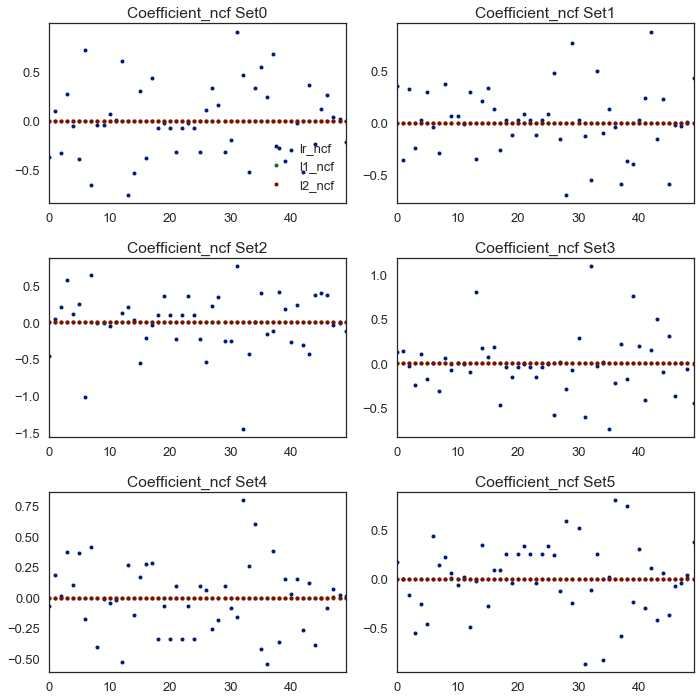

In [557]:
# Plot 6 plots of each multi-class coefficients
fig, axList = plt.subplots(nrows = 3, ncols = 2)
axList = axList.flatten()
fig.set_size_inches(10, 10)

# iterate through each classification 0,1,2,3,4,5
for ax in enumerate(axList): 
    loc = ax[0]
    ax = ax[1]
    
    data_ncf = coefficients_ncf.xs(loc, level = 1, axis = 1)
    data_ncf.plot(marker = 'o', ls = '', ms = 4.0, ax = ax, legend = False)
    
    if ax is axList[0]: 
        ax.legend(loc = 4) 
        
    ax.set(title = 'Coefficient_ncf Set' + str(loc))
    
    plt.tight_layout()

In [558]:
# Predict the class and the probabilty for each 

# coeff_labels_ncf = ['lr_ncf', 'l1_ncf', 'l2_ncf']
# coeff_models_ncf = [lr_ncf, lr_l1_ncf, lr_l2_ncf]

y_pred_ncf = list() 
y_prob_ncf = list() 

for lab, mod in zip(coeff_labels_ncf, coeff_models_ncf): 
    y_pred_ncf.append(pd.Series(mod.predict(X_test_new), 
                                name = lab))
    y_prob_ncf.append(pd.Series(mod.predict_proba(X_test_new).max(axis = 1), 
                                name = lab))
    
y_pred_ncf = pd.concat(y_pred_ncf, axis = 1) 
y_prob_ncf = pd.concat(y_prob_ncf, axis = 1)

In [559]:
coeff_labels_ncf

['lr_ncf', 'l1_ncf', 'l2_ncf']

In [560]:
coeff_models_ncf

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 LogisticRegressionCV(Cs=10, class_weight=None, cv=4, dual=False,
            fit_intercept=True, intercept_scaling=1.0, max_iter=100,
            multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
            refit=True, scoring=None, solver='liblinear', tol=0.0001,
            verbose=0),
 LogisticRegressionCV(Cs=10, class_weight=None, cv=4, dual=False,
            fit_intercept=True, intercept_scaling=1.0, max_iter=100,
            multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
            refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)]

In [561]:
y_prob_ncf.head()

,lr_ncf,l1_ncf,l2_ncf
0,0.221801,0.166667,0.190033
1,0.216879,0.166667,0.186478
2,0.203638,0.166667,0.186008
3,0.217191,0.166667,0.192493
4,0.197752,0.166667,0.189988


In [515]:
y_pred_ncf

,lr_ncf,l1_ncf,l2_ncf
0,1,0,0
1,1,0,0
2,0,0,0
3,0,0,0
4,2,0,2
5,2,0,0
6,0,0,0
7,1,0,0
8,0,0,0
9,1,0,0


In [562]:

metrics_ncf = list() 
cm_ncf = dict() 

for lab in coeff_labels_ncf: 
    precision_ncf, recall_ncf, fscore_ncf, __ = score(Y_test_new, y_pred_ncf[lab], 
                                                      average = 'weighted')
    
    accuracy_ncf = accuracy_score(Y_test_new, y_pred_ncf[lab])
    
    auc_ncf = roc_auc_score(label_binarize(Y_test_new, classes = [0,1,2,3,4,5]), 
                        label_binarize(y_pred_ncf[lab], classes = [0,1,2,3,4,5]), 
                        average = 'weighted')
    
    cm_ncf[lab] = confusion_matrix(Y_test_new, y_pred_ncf[lab])
    
    metrics_ncf.append(pd.Series({'precision': precision_ncf, 
                                  'recall': recall_ncf, 
                                  'fscore': fscore_ncf, 
                                  'accuracy': accuracy_ncf, 
                                  'auc': auc_ncf}, name = lab))
    
metrics_ncf = pd.concat(metrics, axis = 1)
metrics_ncf



C:\Users\japor\Anaconda2\envs\idp\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

In [563]:
coeff_label

MultiIndex(levels=[['l2'], [0, 1, 2, 3, 4, 5]],
           labels=[[0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5]])

In [523]:
## DOUBLE CHECK ABOVE 